# house price project

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from sklearn import linear_model
%matplotlib inline

In [65]:
df = pd.read_csv("./housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [66]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


#### deleting no address data

In [67]:
df = df.dropna(subset=['Address'])

#### converting area to integer

In [68]:
df['Area'] = pd.to_numeric(df['Area'],errors='coerce')
df['Area'].dtype

dtype('float64')

#### deleting unusual areas

In [69]:
df = df[df['Area'] < 500]
# df = df[df["Area"] <= df["Area"].mean() + 3 * df["Area"].std()]

#### converting boolean column to 0 & 1

In [70]:
df[['Parking','Elevator','Warehouse']] = df[['Parking','Elevator','Warehouse']].astype(int)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75.0,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105.0,2,1,1,1,Dorous,5.600000e+09,186666.67


#### plotting

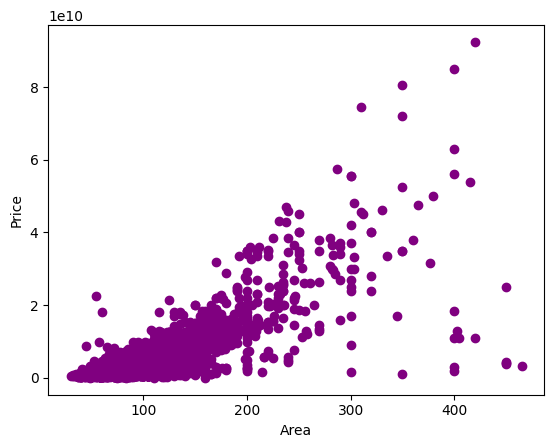

In [71]:
plt.scatter(df.Area, df.Price,  color='purple')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

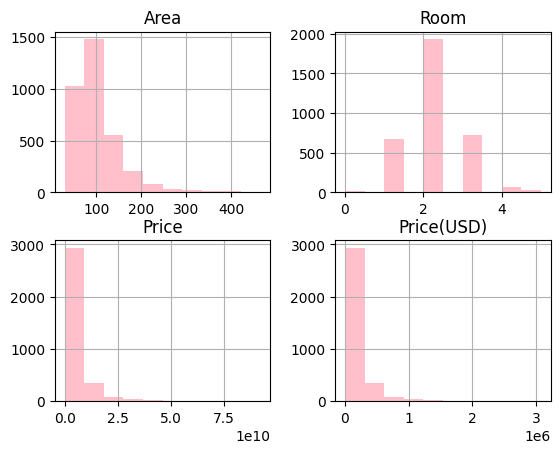

In [72]:
viz = df[['Area','Room','Price','Price(USD)']]
viz.hist(color = 'pink')
plt.show()

#### converting address to number values

In [73]:
address_mean = df.groupby('Address')['Price'].mean()
df['address_encoded'] = df['Address'].map(address_mean)
df[0:5]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),address_encoded
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67,2.985754e+09
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67,2.985754e+09
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33,7.778219e+08
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,9.009217e+08
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,1.196988e+10


#### seprating train and test data

In [74]:
from sklearn.model_selection import train_test_split
X = df[['Area','Room','Parking','Warehouse','Elevator','address_encoded']].values
Y = df[['Price']].values
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2743, 6) (2743, 1)
Test set: (686, 6) (686, 1)


#### pllotting train data

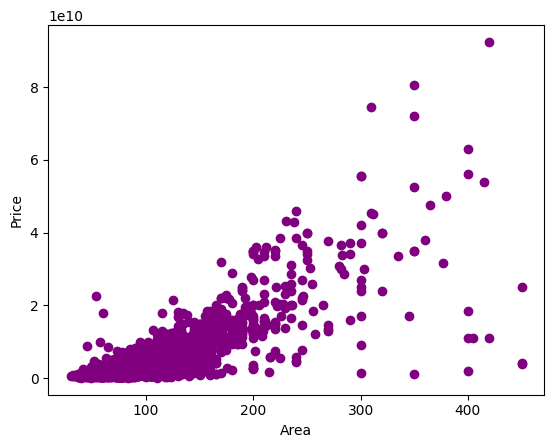

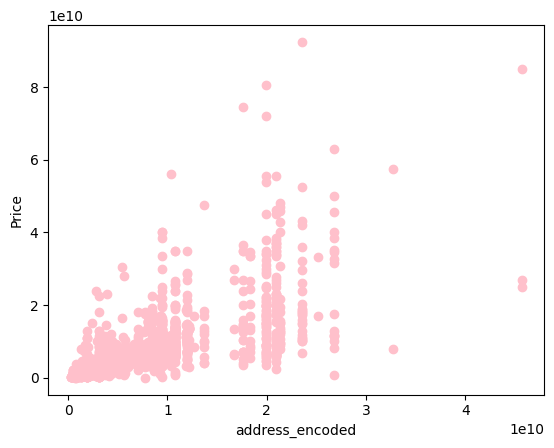

In [75]:
plt.scatter(train.Area, train.Price,  color='purple')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()
plt.scatter(df.address_encoded, df.Price,  color='pink')
plt.xlabel("address_encoded")
plt.ylabel("Price")
plt.show()

#### multiple reggression model

In [76]:
regr = linear_model.LinearRegression()
# x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','address_encoded']])
# y = np.asanyarray(train[['Price']])
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 7.26998053e+07 -5.11756486e+08 -5.84755866e+08  5.59531657e+08
   1.91485287e+08  6.31630076e-01]]


#### prediction

In [63]:
y_hat= regr.predict(test[['Area','Room','Parking','Warehouse','Elevator','address_encoded']])
# x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','address_encoded']])
# y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 14513019378353281024.00
Variance score: 0.74


C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
